# Исследование закономерностей, определяющих успешность компьютерных игр

# Описание проекта
Интернет-магазин "Стримчик" продает по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.  Цель: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Этапы исследования:

- предобработка данных
- анализ выхода игр по годам
- анализ продаж по платформам
- определение актуального периода для прогноза
- оценка влияния отзывов пользователей и критиков на продажи
- составение портрета пользователя по регионам
- проверка гипотез о среденем рейтиге платформ и жанров

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats 
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/datasets/games.csv')

##  Предобработка данных

### Ознакомление с данными

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Ознакомимся с данными. Названия столбцов содержат верхний регистр. В 6 столбцах из 11 есть пропущенные значения. В колонках 'User_Score' и 'Rating' данные типа object, хотя ожидалось бы int, либо float. Выведем первые 10 строк для более подробного ознакомления.

In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Данные в колонке 'Rating' в виде букв, так что там тип object подходит. Приведем названия столбцов к нижнему регистру. 

### Приведение названий столбцов к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Приведение столбца 'user_score' к числовому формату

Выведем данные в столбце 'user_score'. 

In [7]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [8]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Помимо символов с цифрами есть значение 'tbd'. Похоже, что эти значения проставлены в стороках игр с нулевыми продажами в Японии. Для возможности дальнейшей обработки приведем это значение к NaN, а символы с цифрами - к типу float.

In [9]:
def numeric(row):
    if row['user_score'] == 'tbd':
        return np.nan
    else:
        return pd.to_numeric(row['user_score'])
data['user_score'] = data.apply(numeric, axis=1)


In [10]:
data['user_score'].sort_values().unique()


array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

### Проверка данных на дубликаты

Проверим данные на дубликаты.

In [11]:
data.duplicated().sum()

0

Проверим колонки 'genre', 'platform', 'name', 'rating', 'year of_release' на неявные дубликаты.

In [12]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [13]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [14]:
data['name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

In [15]:
data['name'] = data['name'].str.lower()
data['genre'] = data['genre'].str.lower()
data['platform'] = data['platform'].str.lower()

In [16]:
data.duplicated(['name', 'platform', 'year_of_release']).sum()

2

In [17]:
k=-1
for i in data.duplicated(['name', 'platform', 'year_of_release', 'genre']):
    k+=1
    if i == True:
        print(data.loc[k,:])


name                  NaN
platform              gen
year_of_release    1993.0
genre                 NaN
na_sales              0.0
eu_sales              0.0
jp_sales             0.03
other_sales           0.0
critic_score          NaN
user_score            NaN
rating                NaN
Name: 14244, dtype: object
name               madden nfl 13
platform                     ps3
year_of_release           2012.0
genre                     sports
na_sales                     0.0
eu_sales                    0.01
jp_sales                     0.0
other_sales                  0.0
critic_score                83.0
user_score                   5.5
rating                         E
Name: 16230, dtype: object


In [18]:
data = data.drop_duplicates(['name', 'platform', 'year_of_release'])

In [19]:
data.duplicated(['name', 'platform', 'year_of_release']).sum()

0

In [20]:
data['name'].value_counts().head(10)

need for speed: most wanted                12
madden nfl 07                               9
lego marvel super heroes                    9
fifa 14                                     9
ratatouille                                 9
fifa soccer 13                              8
lego star wars ii: the original trilogy     8
angry birds star wars                       8
terraria                                    8
the lego movie videogame                    8
Name: name, dtype: int64

Названия некоторых игры встречаются по несколько раз. Посмотрим на самую часто встречающуюся - 'Need for Speed: Most Wanted'. Она встречается в списке 12 раз. 

In [21]:
data.query('name == "need for speed: most wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,ps2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,ps3,2012.0,racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,need for speed: most wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,need for speed: most wanted,xb,2005.0,racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,need for speed: most wanted,psv,2012.0,racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,need for speed: most wanted,gc,2005.0,racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,pc,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,need for speed: most wanted,wiiu,2013.0,racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,need for speed: most wanted,ds,2005.0,racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Это версии игр, выходившие для разных платфрам в разные годы. 

In [22]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [23]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

### Проверка и заполнение пропусков

Проверим пропуски по столбцам.

In [26]:
data.loc[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


1 строка с пропусками в колонке 'name'. Она же являются единственной строкой с пропусками в колонке 'genre'. Название и жанр не угадать, год выхода 1993 - эту строки можно удалить тк она не информативны.
Вторая такая сторока была удалена во время удаления неполных дубликатов.

In [27]:
data = data.dropna(subset=['name'])

In [28]:
data.loc[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [29]:
data['year_of_release'].isna().sum()

269

In [30]:
data.loc[data['year_of_release'].isna() == True].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [31]:
data.query('name == "madden nfl 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,madden nfl 2004,xb,2003.0,sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,madden nfl 2004,gc,2003.0,sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,madden nfl 2004,gba,2003.0,sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [32]:
data.query('name == "space invaders"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,space invaders,snes,1994.0,shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,space invaders,n64,1999.0,shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,space invaders,gba,2002.0,shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


Делаем вывод, что 1)Год, указанный в названии может не соответствовать году выхода игры, поэтому заполнять таким образом пропуски некорректно.
2)Игра с одним и тем же названием может выгодить в разные годы, и разброс может быть очень большим, поэтому заполнять пропуски средним значением по названию игры также некорректно. Оставляем пропуски.

In [33]:
data['critic_score'].isna().sum()

8576

In [34]:
data['user_score'].isna().sum()

9123

In [35]:
data['rating'].isna().sum()

6764

In [36]:
data.query('name == "need for speed: most wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,ps2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,ps3,2012.0,racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,need for speed: most wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,need for speed: most wanted,xb,2005.0,racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,need for speed: most wanted,psv,2012.0,racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,need for speed: most wanted,gc,2005.0,racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,pc,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,need for speed: most wanted,wiiu,2013.0,racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,need for speed: most wanted,ds,2005.0,racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Мы видим, что у одной и той же игры могут рейтинги присутствовать, а могут не присутствовать. Можно присвоить пропущенным значениям медианный рейтинг по игре (не среднее, тк разброс достаточно большой, а большинство значений при этом высокие). В колонке 'rating' пропуски можно заполнить самым часто встречающимся значением.

In [37]:
pd.Timestamp.now()

Timestamp('2024-11-04 11:57:57.242352')

In [38]:
for i in data['name'].unique():
    data.loc[(data['name'] == i) & (data['critic_score'].isna()), 'critic_score'] = data.loc[(data['name'] == i),'critic_score'].median()
    data.loc[(data['name'] == i) & (data['user_score'].isna()), 'user_score'] = data.loc[(data['name'] == i),'user_score'].median()
    data.loc[(data['name'] == i) & (data['rating'].isna()), 'rating'] = Counter(data.loc[(data['name'] == i),'rating']).most_common(1)[0][0]
       

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     9097 non-null   float64
 9   user_score       8688 non-null   float64
 10  rating           10227 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [45]:
data['critic_score'].isna().sum()

7615

In [46]:
data['user_score'].isna().sum()

8024

In [47]:
data['rating'].isna().sum()

6485

Итого, в колонке 'critic_score' стало на 961 пропуска меньше, в колонке 'user score' - на 1099, в колонке 'rating' - на 279. Для остальных игр с пропусками в данных колонках не нашлось таких же игр без пропусков.

In [48]:
data.query('name == "need for speed: most wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,ps2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,ps3,2012.0,racing,0.71,1.46,0.06,0.58,82.0,8.5,T
1190,need for speed: most wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,need for speed: most wanted,xb,2005.0,racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,need for speed: most wanted,psv,2012.0,racing,0.33,0.45,0.01,0.22,82.0,8.5,T
3581,need for speed: most wanted,gc,2005.0,racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,pc,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,need for speed: most wanted,wiiu,2013.0,racing,0.13,0.12,0.00,0.02,82.0,8.5,T
6410,need for speed: most wanted,ds,2005.0,racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Проверка на примере 'Need for Speed: Most Wanted' показывает правильный результат.

### Подсчет суммарных продаж во всех регионах.

Посчитаем суммарные продажи во всех регионах.

In [49]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']+data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     9097 non-null   float64
 9   user_score       8688 non-null   float64
 10  rating           10227 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


In [51]:
data['rating'] = data['rating'].fillna('UN') 

In [52]:
data['rating'].isna().sum()

0

Вывод: Была приизведена предобработка дданных: названия столбцов, а также категориальные данные  были приведены к нижнему регистру. Значения в колонке 'user_score' были преобразованы из типа 'object' в тип 'float', значения 'tbd' были преобразованы в NaN для возможности дальнейшей обработки. В 6 столбцах из 11 обнаружились пропущенные значения. Были удалены 2 неявных дубликата и неинформативные строки с пропусками в столбцах 'name' и 'genre'. В столбцах 'critic_score' заполнили медианными значениями 961 пропуска, 'user score' - 1099, 'rating' - 279 (самыми частыми значениями). Остальные пропуски в столбце 'rating' заменили на 'UN'.

## Исследовательский анализ данных

### Анализ количества выпусаемых игр по годам

In [53]:
data_by_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

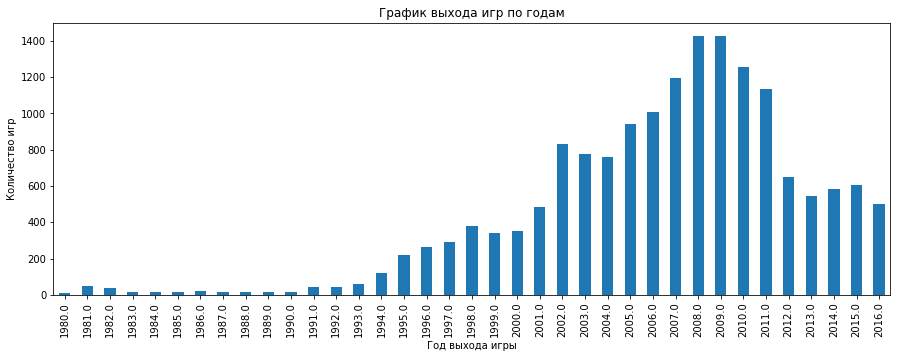

In [54]:
data_by_year['name'].plot(kind='bar', figsize=(15,5));
plt.ylabel('Количество игр');
plt.title('График выхода игр по годам');
plt.xlabel('Год выхода игры');


Количество выходивших игр было незначительным (менее 100) вплоть до 1994 года, когда оно постепенно начало расти. В 2002 годы был резкий скачок - с 500 до 900 игр в год. Больше всего игр выходило в период 2005-2011 (1000-1500 в год), затем количество снизилось и с тех пор держится примерно на одном уровне (500-600 игр в год). Для дальнейших прогнозов важны данные начиная с 2012 года.

### Анализ продаж игр по платформам

Выберем платформы с наибольшими суммарными продажами.

In [55]:
data_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
data_by_platform.sort_values(by='total_sales', ascending = False).head(10)


,total_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.64
wii,907.51
ds,806.12
ps,730.86
gba,317.85
ps4,314.14
psp,294.05


Построим график продаж по годам для топ 5 платформ.

In [56]:
data = data.drop(data[(data['platform'] == "ds") & (data['year_of_release']== 1985.0)].index)

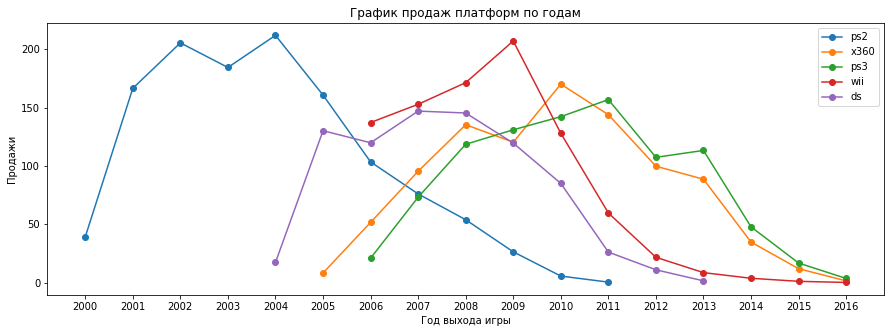

In [57]:

platforms = ['ps2','x360','ps3','wii','ds']


for i in platforms:

    data_by_year = data.query('platform == @i').pivot_table(index='year_of_release',
                                                            values='total_sales', 
                                                            aggfunc='sum')
    data_by_year['total_sales'].plot(figsize=(15,5), style='-o'); 
  
plt.ylabel('Продажи');
plt.xlabel('Год выхода игры');
plt.title('График продаж платформ по годам');
plt.legend(labels=platforms);
plt.xticks(np.arange(2000, 2017, 1.0));

У каждой платформы в первые 4-5 лет продажи идут вверх потом постепенно снижаются. Жизненный цикл платформ - около 10 лет, потом на смену приходит новая версия. Поэтому актуальный период для анализа - с 2014, чтобы был понятен тренд - в каком моменте цикла находится платформа.

### Анализ продаж по платформам за актуальный период

In [58]:
latest_data = data.query('year_of_release >=2014')
data_by_platform = latest_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')

data_by_platform.sort_values(by='total_sales', ascending = False)

,total_sales
platform,
ps4,288.15
xone,140.36
3ds,86.68
ps3,68.18
x360,48.22
wiiu,42.98
pc,27.05
psv,22.40
wii,5.07


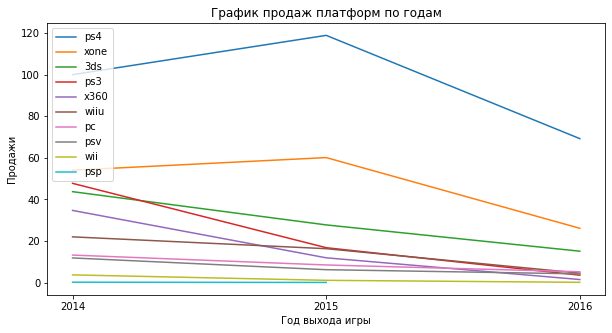

In [59]:
platforms = ['ps4', 'xone', '3ds', 'ps3', 'x360', 'wiiu', 'pc', 'psv', 'wii','psp']

for i in platforms:
    latest_data.query('platform == @i').pivot_table(index='year_of_release', 
                                                    values='total_sales', 
                                                    aggfunc='sum')['total_sales'].plot(figsize=(10,5), 
                                                    style='-'); 
  
plt.ylabel('Продажи');
plt.title('График продаж платформ по годам');
plt.legend(labels=platforms, loc='upper left');
plt.xticks(np.arange(2014, 2017, 1.0));
plt.xlabel('Год выхода игры');

Перспективными с точки зрения роста продаж в 2017 году выглядят платформы PS4 и XOne, тк только они показывают рост на момент 2015 года (за 2016 год данные могут быть неполными, поэтому он не показателен). 3DS скорее всего стагнирует на 3м месте по продажам.

### Анализ глобальных продаж игр по платформам

In [60]:
latest_data['total_sales'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

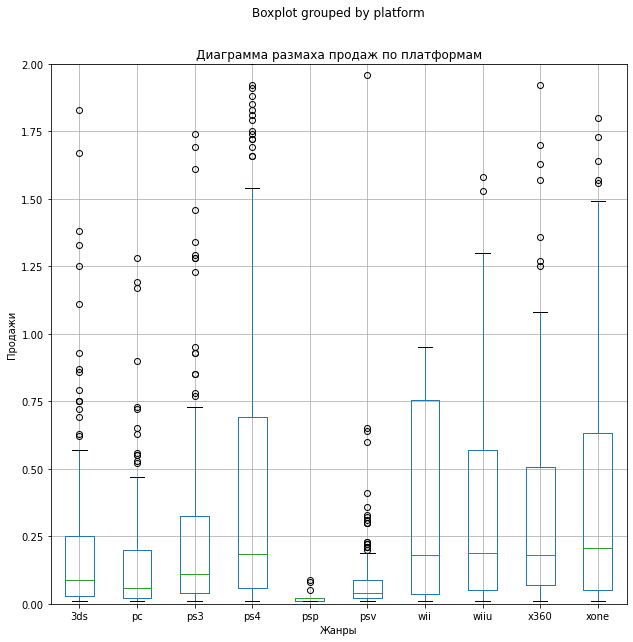

In [61]:
latest_data.boxplot(by='platform', column=['total_sales'], figsize=(10,10));
plt.ylim(0,2);
plt.ylabel('Продажи');
plt.title('Диаграмма размаха продаж по платформам');
plt.xlabel('Жанры');

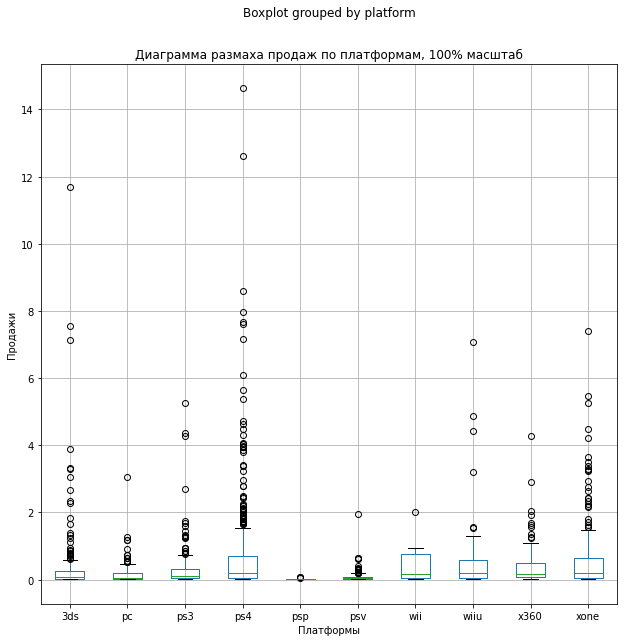

In [62]:
latest_data.boxplot(by='platform', column=['total_sales'], figsize=(10,10));

plt.ylabel('Продажи');
plt.xlabel('Платформы');
plt.title('Диаграмма размаха продаж по платформам, 100% масштаб');

PS4, XOne, Wii - лидеры по основным продажам. У PS4 и XOne также много высоких выбросовю, что делает их самыми перспективными платформами. У 3DS - много звездных выбросов, но продажи в основном диапазоне невысокие. 

### Анализ влияния отзывов на продажи

Постмотрим, как влияют на продажи отзывы пользователей и критиков для PS4.

In [63]:
ps4_clean = latest_data.query('platform == "ps4"')
df = ps4_clean.loc[:,['total_sales','critic_score','user_score']]
df.corr().round(2)

,total_sales,critic_score,user_score
total_sales,1.00,0.39,-0.02
critic_score,0.39,1.00,0.56
user_score,-0.02,0.56,1.00


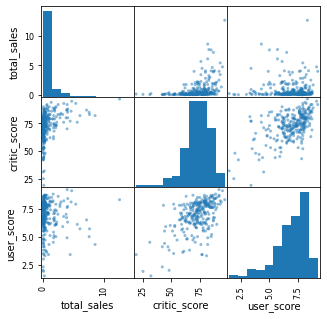

In [64]:
pd.plotting.scatter_matrix(df, figsize=(5,5));

Между отзывами критиков и продажами есть слабая прямая корреляция (0,39), а между продажами и отзывами пользователей корреляция практически отсутствует (-0,02). Зато наблюдается средней силы положительная взаимосвязь между отзывами критиков и пользователей (0.56).

In [65]:
xone_clean = latest_data.query('platform == "xone"')
df = xone_clean.loc[:,['total_sales','critic_score','user_score']]
df.corr().round(2)


,total_sales,critic_score,user_score
total_sales,1.00,0.38,-0.09
critic_score,0.38,1.00,0.46
user_score,-0.09,0.46,1.00


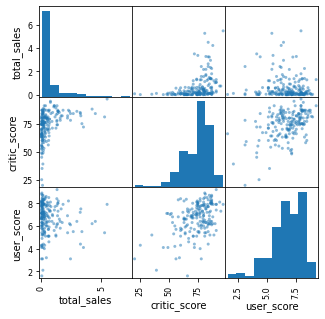

In [66]:
pd.plotting.scatter_matrix(df, figsize=(5,5));

In [67]:
ps3_clean = latest_data.query('platform == "ps3"')
df = ps3_clean.loc[:,['total_sales','critic_score','user_score']]
df.corr().round(2)

,total_sales,critic_score,user_score
total_sales,1.00,0.32,-0.15
critic_score,0.32,1.00,0.31
user_score,-0.15,0.31,1.00


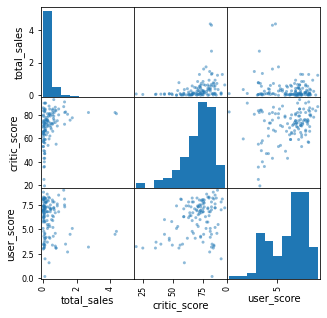

In [68]:
pd.plotting.scatter_matrix(df, figsize=(5,5));

По остальным платформам корреляция между продажами и отзывами имеет похожие значения.

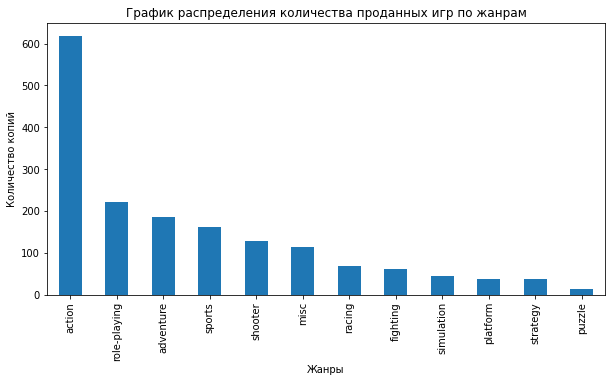

In [69]:
data_by_genre = latest_data.pivot_table(index='genre', values='name', aggfunc='count')
data_by_genre.sort_values(by='name', ascending=False).plot(kind='bar', figsize=(10,5), legend=False);
plt.title('График распределения количества проданных игр по жанрам');
plt.ylabel('Количество копий');
plt.xlabel('Жанры');

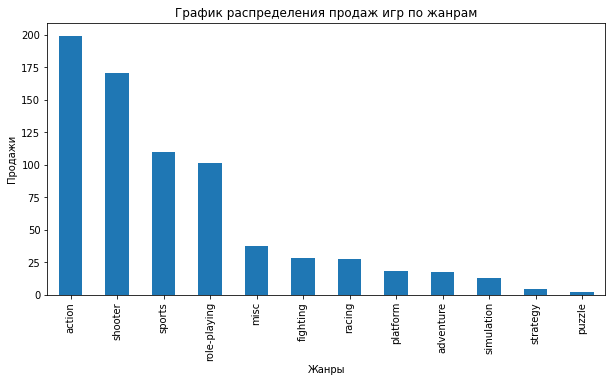

In [70]:
data_by_genre = latest_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
data_by_genre.sort_values(by='total_sales', ascending=False).plot(kind='bar', figsize=(10,5), legend=False);
plt.title('График распределения продаж игр по жанрам');
plt.ylabel('Продажи');
plt.xlabel('Жанры');

Action, Sports и Role-Playing - самые популярные жанры и с точки зрения количества игр, и с точки зрения продаж. По количеству проданных копий в топе еще присутствует Adventure (#3), а по продажам - Shooter (#2). Меньше всего прибыли принесли игры жанра Puzzle, Strategy и Simulation.

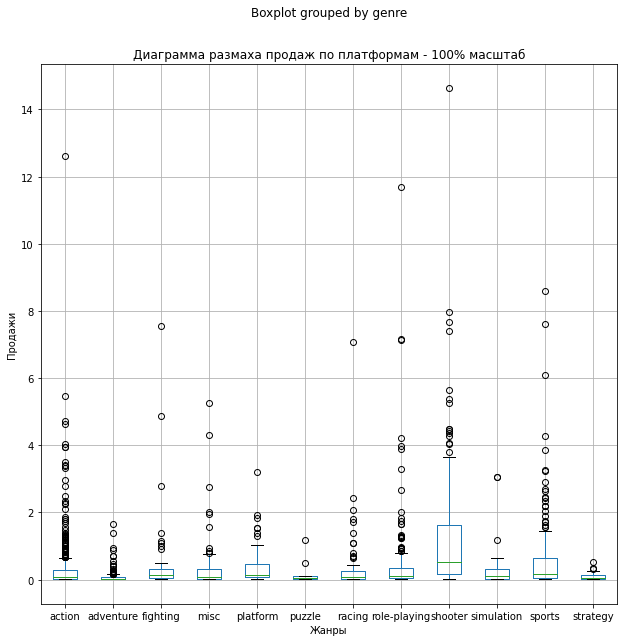

In [71]:
latest_data.boxplot(by='genre', column=['total_sales'], figsize=(10,10));
plt.xlabel('Жанры')
plt.ylabel('Продажи');
plt.title('Диаграмма размаха продаж по платформам - 100% масштаб');

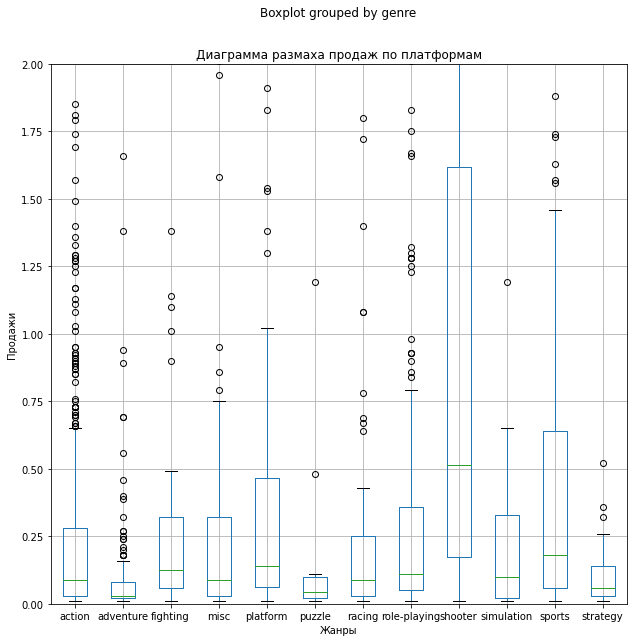

In [72]:
latest_data.boxplot(by='genre', column=['total_sales'], figsize=(10,10));
plt.ylim(0,2);
plt.ylabel('Продажи');
plt.xlabel('Жанры');
plt.title('Диаграмма размаха продаж по платформам');

Самая большая медиана и  0.75 квантиль - у "Shooter", это абсолютный лидер (у него же и самые высокие выбросы). За ним c большим отрывом следует "Sports", выбросы у него также приличные. А вот "Action" имеем меньшую медиану, зато имеет много высоких выбросов - это делает его все же менее привлекательным, чем первые 2 жанра. Самые неперспективные жанры - "Puzzle" и "Strategy". "Adventure" хоть и имеет основное количество продаж в низком диапазоне, все же имеет большое количество звездных выбросов.

Вывод: 
1)Количество выходивших игр было незначительным до 1994 года, в 2002 годы был резкий скачок, а больше всего игр выходило в период 2005-2011 (1000-1500 в год), затем количество снизилось и с тех пор держится примерно на одном уровне (500-600 игр в год). 
2)Для дальнейших прогнозов важны данные начиная с 2014 года. У каждой платформы в первые 4-5 лет продажи идут вверх потом постепенно снижаются. Жизненный цикл платформ - около 10 лет, потом на смену приходит новая версия. 3)Перспективными с точки зрения роста продаж в 2017 году выглядят платформы PS4 и XOne, тк только они показывают рост на момент 2015 года, имеют высокую медиану и много звездных выбросов. 3DS скорее всего стагнирует на 3м месте по продажам исключительно засчет большого числа выбросов. 
4)Отзывы критиков имеют слабую взаимосвязь с продажами, а с отзывы пользователей прадажи не взаимосвязаны.
5)Самые перспективные жанры: "Shooter", "Sports" и "Action" (последний - с точки зрения "звездных" игр).

## Портрет пользователя каждого региона

### Анализ самых популярных платформ по регионам

In [73]:
eu_platforms_top5=latest_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
                        .sort_values(by='eu_sales', ascending=False).head(5)
eu_platforms_top5

,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12


In [74]:
eu_platforms_others=latest_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
                        .sort_values(by='eu_sales', ascending=False).tail(5).sum()
eu_platforms_others

eu_sales    34.76
dtype: float64

In [75]:
eu_platforms = pd.DataFrame({'platform': ["ps4","xone", "ps3", "ps", "3ds", "others"],
                             'eu_sales': [130, 46, 26, 18, 16, 35]})


In [76]:
na_platforms_top5=latest_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
                        .sort_values(by='na_sales', ascending=False).head(5)
na_platforms_top5

,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05


In [77]:
na_platforms_others=latest_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
                        .sort_values(by='na_sales', ascending=False).tail(5).sum()
na_platforms_others

na_sales    31.19
dtype: float64

In [78]:
na_platforms = pd.DataFrame({'platform': ["ps4","xone", "x360", "3ds", "ps3", "others"],
                             'na_sales': [99, 81, 28, 23, 22, 31]})

In [79]:
jp_platforms_top5= latest_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
                         .sort_values(by='jp_sales', ascending=False).head(5)
jp_platforms_top5

,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31


In [80]:
jp_platforms_others=latest_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
                        .sort_values(by='jp_sales', ascending=False).tail(5).sum()
jp_platforms_others

jp_sales    0.76
dtype: float64

In [81]:
jp_platforms = pd.DataFrame({'platform': ["3ds", "ps4", "psv", "ps3", "wiiu", "others"],
                             'jp_sales': [44, 15, 15, 11, 7, 1]})


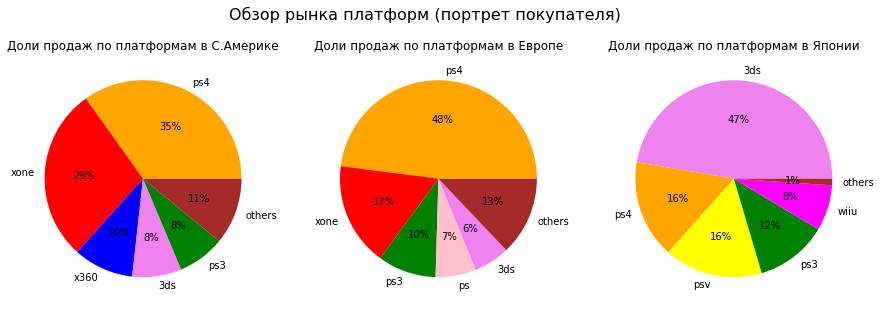

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))

fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=16);

labels=['ps4', 'xone', 'x360', '3ds', 'ps3', "others"];
colors=['orange', 'red', 'blue', 'violet', 'green', 'brown'];
ax1.pie(na_platforms['na_sales'], autopct='%.0f%%', labels=labels, colors=colors);
ax1.set_title('Доли продаж по платформам в С.Америке')


labels=["ps4","xone", "ps3", "ps", "3ds", "others"];
colors=['orange', 'red', 'green','pink', 'violet', 'brown'];
ax2.set_title('Доли продаж по платформам в Европе')
ax2.pie(eu_platforms['eu_sales'], autopct='%.0f%%', labels=labels,colors=colors);


labels=['3ds', 'ps4', 'psv', 'ps3', 'wiiu','others'];
colors=['violet', 'orange', 'yellow','green', 'magenta', 'brown'];
ax3.set_title('Доли продаж по платформам в Японии')
ax3.pie(jp_platforms['jp_sales'], autopct='%.0f%%', labels=labels, colors=colors);


В Северной Америке и Европе похожая картина в топ5, за исключением того, что в Сев. Америке на 3м месте X360, за ней следует 3DS и замыкает топ5 PS3. А в Европе PS3 на 3м месте, X360 отсутствует в топ5, зато присутствует PS на 4 месте. В Японии же совершенно иная картина - на первом месте 3DS, потом PS4, в тройке лидеров PSV, а замыкает пятерку WiiU. X360 и XOne - платформы американского производства, это объясняет их присутствие в тройке лидеров в Северной Америке, а 3DS - это японская Nintendo, PS4, PS3б PSV, PS - тоже японские. Таким образом, в Сев. Америке большинство пользователей (64%) предпочитают американские платформы, в Европе популярны в основном японские модели, но все же 17% пользователей выбирают американскую XOne. На японском рынке пользователи отдают предпочтение исключительно локальным платформам с абсолютным лидерством 3DS.

### Анализ самых популярных жанров по регионам

In [83]:
eu_genres_top5=latest_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
                     .sort_values(by='eu_sales', ascending=False).head(5)
eu_genres_top5


,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13


In [84]:
eu_genres_others=latest_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
                        .sort_values(by='eu_sales', ascending=False).tail(7).sum()
eu_genres_others

eu_sales    42.45
dtype: float64

In [85]:
eu_genres = pd.DataFrame({'genre': ["action","shooter", "sports", "role-playing", "racing", "others"],
                             'eu_sales': [75, 66, 46, 28, 14, 42]})


In [86]:
na_genres_top5=latest_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
                     .sort_values(by='na_sales', ascending=False).head(5)
na_genres_top5

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05


In [87]:
na_genres_others=latest_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
                        .sort_values(by='na_sales', ascending=False).tail(7).sum()
na_genres_others

na_sales    37.86
dtype: float64

In [88]:
na_genres = pd.DataFrame({'genre': ["shooter","action", "sports", "role-playing", "misc", "others"],
                             'na_sales': [79, 72, 46, 33, 15, 38]})

In [89]:
jp_genres_top5=latest_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
                      .sort_values(by='jp_sales', ascending=False).head(5)
jp_genres_top5

,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


In [90]:
jp_genres_others=latest_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
                        .sort_values(by='jp_sales', ascending=False).tail(7).sum()
jp_genres_others

jp_sales    15.5
dtype: float64

In [91]:
jp_genres = pd.DataFrame({'genre': ["role-playing","action", "fighting", "misc", "shooter", "others"],
                             'jp_sales': [31, 30, 6, 6, 5, 15]})

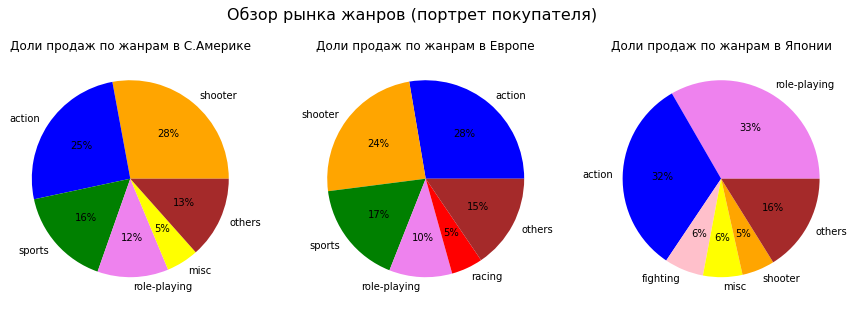

In [92]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
fig.suptitle('Обзор рынка жанров (портрет покупателя)', fontsize=16);

labels=['shooter','action', 'sports', 'role-playing', 'misc', 'others'];
colors=['orange', 'blue', 'green', 'violet', 'yellow','brown']
ax1.pie(na_genres['na_sales'], autopct='%.0f%%', labels=labels, colors=colors);
ax1.set_title('Доли продаж по жанрам в С.Америке')


labels=["action","shooter", "sports", "role-playing", "racing", "others"];
colors=['blue', 'orange', 'green', 'violet', 'red', 'brown']
ax2.set_title('Доли продаж по жанрам в Европе')
ax2.pie(eu_genres['eu_sales'], autopct='%.0f%%', labels=labels,colors=colors);


labels=["role-playing","action", "fighting", "misc", "shooter", "others"];
colors=['violet','blue','pink', 'yellow','orange', 'brown']
ax3.set_title('Доли продаж по жанрам в Японии')
ax3.pie(jp_genres['jp_sales'], autopct='%.0f%%', labels=labels, colors=colors);


Опять же, в Северной Америке и Европе похожая картина: в топе такие жанры, как Action, Shooter, Sports, Role_playing, за исключением того, что в Сев.Америке замыкает пятерку Misc, а в Европе - Racing. Видимо, это объясняется тем фактом, что гонки больше развиты в Европе, чем в Америке. В Японии же немного иная картина: на первом месте  Role-Playing, потом Action и Fighting.  Популярность Role-playing обусловлена, видимо, тенденцией к изолированности от социума в Японии, уходом в виртуальную реальность, а Fighting - популярностью единоборств в японской культуре.

### Анализ самых популярных жанров по регионам

#### Анализ рынка Японии

In [93]:
latest_data.sort_values(by='jp_sales', ascending=False)[['name', 'jp_sales','rating']].head(10)

,name,jp_sales,rating
412,yokai watch 2 ganso/honke,3.18,UN
47,pokemon omega ruby/pokemon alpha sapphire,3.10,UN
406,monster hunter x,2.79,UN
563,yokai watch 2 shinuchi,2.68,UN
312,monster hunter 4 ultimate,2.62,T
96,super smash bros. for wii u and 3ds,2.43,UN
694,yokai watch busters,2.29,UN
108,pokemon sun/moon,2.26,UN
247,splatoon,1.46,E10+
457,animal crossing: happy home designer,1.40,E


In [94]:
latest_data.sort_values(by='jp_sales', ascending=False)[['name', 'jp_sales','rating']].tail(10)

,name,jp_sales,rating
6744,teenage mutant ninja turtles: danger of the ooze,0.0,E10+
12676,toy soldiers: war chest,0.0,UN
1536,the elder scrolls online,0.0,M
6656,anno 2205,0.0,E10+
12719,street fighter v,0.0,T
12720,the amazing spider-man 2 (2014),0.0,UN
1548,the lego movie videogame,0.0,E10+
12728,mx vs. atv supercross encore,0.0,E
12751,tropico 5,0.0,T
13891,the sims 4: spa day,0.0,T


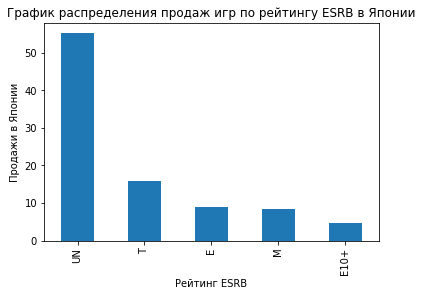

In [95]:
jp=latest_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')\
              .sort_values(by='jp_sales', ascending=False)
jp.plot(kind='bar',style='-', legend=False);
plt.title('График распределения продаж игр по рейтингу ESRB в Японии');
plt.ylabel('Продажи в Японии');
plt.xlabel('Рейтинг ESRB');

В ТОП 10 по Японии 1 игра с рейтингом 'M' (для взрослых), две с рейтингом 'T'(рассчитана на тинейджеров), остальные без рейтинга. В конце списка - также игры с рейтингом 'M', 'Т' и без рейтинга. В целом больше всего игр продано именно без рейтинга. Можно сделать  общий вывод, что на японском рынке рейтинг скорее всего не влияет на продажи игр.

#### Анализ рынка Северной Америки

In [97]:
latest_data.sort_values(by='na_sales', ascending=False)[['name', 'na_sales','rating']].tail(10)

,name,na_sales,rating
13110,utawarerumono: futari no hakuoro,0.0,UN
13128,downtown no gaki no tsukai yaarahen de!! zetta...,0.0,UN
13129,super heroine chronicle,0.0,UN
13143,steins;gate 0,0.0,M
13169,ride,0.0,E
13179,sengoku basara 4: sumeragi,0.0,UN
13183,kamen rider: battride war genesis,0.0,UN
13192,sherlock holmes: crimes & punishments,0.0,UN
13212,sword art online: game director's edition,0.0,UN
16714,winning post 8 2016,0.0,UN


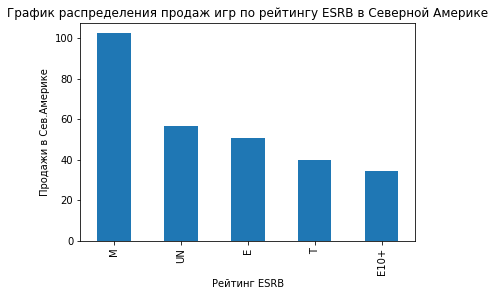

In [98]:
na=latest_data.pivot_table(index='rating', values='na_sales', aggfunc='sum')\
              .sort_values(by='na_sales', ascending=False)
na.plot(kind='bar',style='-', legend=False);
plt.ylabel('Продажи в Сев.Америке');
plt.title('График распределения продаж игр по рейтингу ESRB в Северной Америке');
plt.xlabel('Рейтинг ESRB');

#### Анализ рынка Европы

In [99]:
latest_data.sort_values(by='eu_sales', ascending=False)[['name', 'eu_sales','rating']].head(10)

,name,eu_sales,rating
42,grand theft auto v,6.31,M
77,fifa 16,6.12,E
31,call of duty: black ops 3,5.86,UN
94,fifa 17,5.75,E
143,fifa 15,4.33,E
47,pokemon omega ruby/pokemon alpha sapphire,3.49,UN
87,star wars battlefront (2015),3.49,UN
92,call of duty: advanced warfare,3.48,M
105,fallout 4,3.27,M
264,fifa 15,3.02,E


In [100]:
latest_data.sort_values(by='eu_sales', ascending=False)[['name', 'eu_sales','rating']].tail(10)

,name,eu_sales,rating
13183,kamen rider: battride war genesis,0.0,UN
13212,sword art online: game director's edition,0.0,UN
13224,ghostbusters (2016),0.0,UN
13227,hatsune miku: project diva x,0.0,T
13232,resident evil 4 hd,0.0,UN
13266,nascar heat evolution,0.0,E
13313,utawarerumono: itsuwari no kamen,0.0,UN
13349,tokyo ghoul: jail,0.0,UN
13371,shin hayarigami,0.0,UN
16714,winning post 8 2016,0.0,UN


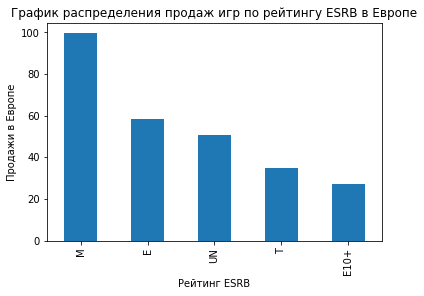

In [101]:
eu=latest_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')\
              .sort_values(by='eu_sales', ascending=False)
eu.plot(kind='bar',style='-', legend=False);
plt.ylabel('Продажи в Европе');
plt.title('График распределения продаж игр по рейтингу ESRB в Европе');
plt.xlabel('Рейтинг ESRB');

В Европе в топ 10 в основном игры с рейтингом 'M' (для взрослых) и с рейтингм'Е' (для всех), а в конце списка - в основном с неопределеннным рейтингом.  В целом больше всего игр продано с рейтингом 'M', далее примерно  идут игры для всех, и с неопределнным рейтингом. Можно предположить, что большей популярностью на этом рынке пользуются игры для взрослых и для всех возрастных категорий, рейтинг ESRB влияет на продажи.

Вывод: В Сев. Америке большинство пользователей (64%) предпочитают американские платформы,  топе такие жанры, как Action, Shooter, Sports, Role_playing, а рейтинг ESRB имеет среднее влияние на выбор пользователя (в топе игры с рейтингом для взрослых и без рейтинга.
     В Европе популярны в основном японские модели, но все же 17% пользователей выбирают американскую XOne. В топе такие жанры, как Action, Shooter, Sports, Role_playing, Racing. Видимо, это объясняется тем фактом, что гонки больше развиты в Европе, чем в Америке. Рейтинг ESRB имеет влияние на выбор пользователей - в топе игры с рейтингом для взрослых и для всех возрастных категорий.
    На японском рынке пользователи отдают предпочтение исключительно локальным платформам с абсолютным лидерством 3DS. Из жанров на первом месте  Role-Playing, потом Action и Fighting.  Популярность Role-playing обусловлена, видимо, тенденцией к изолированности от социума в Японии, уходом в виртуальную реальность, а Fighting - популярностью единоборств в японской культуре. Рейтинг ESRB скорее всего не влияет на продажи игр.

## Проверка гипотез

Необходимо проверить гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны, альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [102]:
user_score=latest_data.dropna(subset=['user_score'])

In [103]:
user_score.query('platform == "xone"')['user_score'].describe().round(1)

count    189.0
mean       6.7
std        1.4
min        1.6
25%        6.0
50%        6.9
75%        7.8
max        9.2
Name: user_score, dtype: float64

In [104]:
user_score.query('platform == "pc"')['user_score'].describe().round(1)

count    123.0
mean       6.3
std        1.7
min        1.4
25%        5.4
50%        6.8
75%        7.6
max        9.3
Name: user_score, dtype: float64

In [105]:
alpha=0.05
results = scipy.stats.ttest_ind(user_score.query('platform == "xone"')['user_score'], user_score.query('platform == "pc"')['user_score'], equal_var=False)
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

0.03528062676563413
Отвергаем нулевую гипотезу


Значит, есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC не равны. P-value  0,035 значит, что наблюдаемое значение слишком маловероятно при такой нулевой гипотезе - оно меньше заданного уровня статистической значимости 0.05. При уровне статистичекой значимости 0.01 у нас бы не получиось отвергнуть нулевую гипотезу о равенстве.

In [107]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = scipy.stats.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


Теперь необходимо проверить гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны, альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

In [108]:
user_score.query('genre == "action"')['user_score'].describe().round(1)

count    347.0
mean       6.8
std        1.4
min        2.0
25%        6.3
50%        7.1
75%        7.8
max        9.1
Name: user_score, dtype: float64

In [109]:
user_score.query('genre == "sports"')['user_score'].describe().round(1)

count    142.0
mean       5.2
std        1.8
min        0.2
25%        3.7
50%        5.5
75%        6.6
max        8.8
Name: user_score, dtype: float64

In [110]:
alpha=0.05
results = scipy.stats.ttest_ind(user_score.query('genre == "action"')['user_score'], 
                                user_score.query('genre == "sports"')['user_score'], 
                                equal_var=False)
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

4.1453988885833904e-18
Отвергаем нулевую гипотезу


Значит, есть основания полагать, что средние пользовательские рейтинги жанров Action и Sports не равны.

## Общий вывод

Вывод исследования:
Была приизведена предобрботка дданных:
Названия столбцов были приведены к нижнему регистру.
Значения в колонке 'user_score' были преобразованы из типа 'object' в тип 'float', значения 'tbd' были преобразованы в NaN для возможности дальнейшей обработки.
Были удалены 2 неполных дубликата.
В 6 столбцах из 11 обнаружились пропущенные значения.
Были удалена 1 неинформативные строки с пропусками в столбцах 'name' и 'genre'.
В стобцах 'critic_score' заполнили медианными значениями 961 пропуска, 'user score' - 1099,  'rating' - 279 (самыми частыми значениями). Остальные пропуски в столбце 'rating' заменили на 'UN' для возможности дальнейшего анализа.

Количество выходивших игр было незначительным (менее 100) вплоть до 1994 года, когда оно постепенно начало расти. В 2002 годы был резкий скачок - с 500 до 900 игр в год. Больше всего игр выходило в период 2005-2011 (1000-1500 в год), затем количество снизилось и с тех пор держится примерно на одном уровне (500-600 игр в год). Для дальнейших прогнозов важны данные начиная с 2012 года.

У каждой платформы в первые 4-5 лет продажи идут вверх потом постепенно снижаются. Жизненный цикл платформ - около 10 лет, потом на смену приходит новая версия. Поэтому актуальный период для анализа - с 2014.

Перспективными с точки зрения роста продаж в 2017 году выглядят платформы PS4 и XOne, тк только они показывают рост на момент 2015 года, имеют высокую медиану и много звездных выбросов. 3DS скорее всего стагнирует на 3м месте по продажам исключительно засчет большого числа выбросов. 

Отзывы критиков имеют слабую взаимосвязь с продажами, а с отзывы пользователей прадажи не взаимосвязаны.
Самые перспективные жанры: "Shooter", "Sports" и "Action" (последний - с точки зрения "звездных" игр).

В Сев. Америке большинство пользователей (64%) предпочитают американские платформы,  топе такие жанры, как Action, Shooter, Sports, Role_playing, а рейтинг ESRB имеет среднее влияние на выбор пользователя (в топе игры с рейтингом для взрослых и без рейтинга.
В Европе популярны в основном японские модели, но все же 17% пользователей выбирают американскую XOne. В топе такие жанры, как Action, Shooter, Sports, Role_playing, Racing. Видимо, это объясняется тем фактом, что гонки больше развиты в Европе, чем в Америке. Рейтинг ESRB имеет влияние на выбор пользователей - в топе игры с рейтингом для взрослых и для всех возрастных категорий.
На японском рынке пользователи отдают предпочтение исключительно локальным платформам с абсолютным лидерством 3DS. Из жанров на первом месте  Role-Playing, потом Action и Fighting.  Популярность Role-playing обусловлена, видимо, тенденцией к изолированности от социума в Японии, уходом в виртуальную реальность, а Fighting - популярностью единоборств в японской культуре. Рейтинг ESRB скорее всего не влияет на продажи игр.

Проверили гипотезу о том, что средние пользовательские рейтинги платформ 'Xbox One' и 'PC' равны, гипотеза была отвергнута.
Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны также была отвергнута.